<a href="https://colab.research.google.com/github/sirmelon/office-dataset/blob/main/Office_Research_paper_Anqi_Mao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Popularity affects the over all score of a lot ofere different media**

# Background

  The office dataset includes information on episodes and there scores. These scores consist of IMBd_score, sentimentAnalysis_score, sentimentr_score, and syuzhet_score. For my research I wanted to focus on a simple scoring system, the IMDb score. I chose this because it rates each episode through out the show. This way I could explore my research question. Vote counts is also another variable that is in the data set which is how many people voting.

  These variables are very important to my question. If votes dip or go up does the score also change in response? I wanted to explore how popularity affects the score of media and this could serve as a base for other research. My hypothesis is, yes it does change and when the amount of voters go up so will the score. This also goes the other way around

  

**Sample of the dataset**

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv"


office_df = pd.read_csv(url)#importing and reading the dataset
office_df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


# **Results**

  This dataset seems to missing data so well have to clean it up a little. Even if im not gonna use the variables that are missing i prefer cleaning it up rather than leave it like that

In [2]:
mean_age = office_df['sentimentAnalysis_score'].mean()#fills in the sentimental analysis scores with the mean/average
office_df['sentimentAnalysis_score'] = office_df['sentimentAnalysis_score'].fillna(mean_age)
office_df['sentimentAnalysis_score']

office_df = office_df.drop('text_w_direction', axis=1)
office_df.info()

office_df = office_df.drop('text', axis=1)
office_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    55130 non-null  int64  
 1   season                   55130 non-null  int64  
 2   episode                  55130 non-null  int64  
 3   episode_name             55130 non-null  object 
 4   director                 55130 non-null  object 
 5   writer                   55130 non-null  object 
 6   character                55130 non-null  object 
 7   text                     54753 non-null  object 
 8   imdb_rating              55130 non-null  float64
 9   total_votes              55130 non-null  int64  
 10  air_date                 55130 non-null  object 
 11  sentimentAnalysis_score  55130 non-null  float64
 12  sentimentr_score         55130 non-null  float64
 13  syuzhet_score            55130 non-null  float64
dtypes: float64(4), int64(4

  This graph represents our question, and also accuratley represents the trend. As the votes go up so does the score. In other words popularity is indeed increasing the total votes. It also proves our hypothesis to be true for the most part.

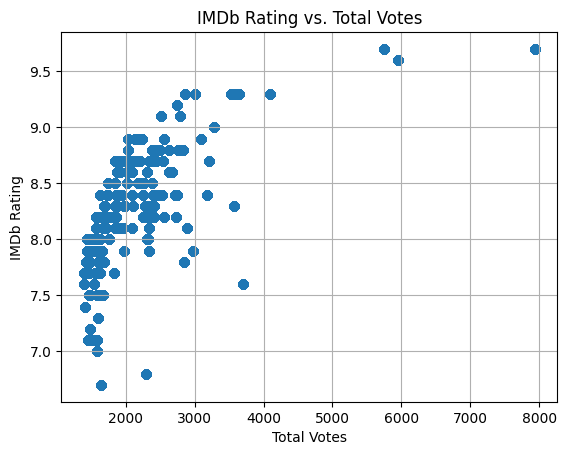

In [3]:
import matplotlib.pyplot as plt

x = office_df['total_votes']
y = office_df['imdb_rating']

plt.scatter(x,y)
plt.xlabel('Total Votes')
plt.ylabel('IMDb Rating')
plt.title('IMDb Rating vs. Total Votes')
plt.grid(True)
plt.show()

I then wanted to see if we could predict the IMDb score using linear regression. At first we use the mean squared and r2. The mean squared shows that we arent that far from being wrong, and the r2 shows that there is a low variation rate. The graph that is shown seems to have some questionable accuracy so far so it is a little weird.

In [4]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Define new features andtarget
features = office_df[['season','episode', 'total_votes','sentimentAnalysis_score','sentimentr_score','syuzhet_score']]

target =office_df['imdb_rating']
# Train-test split
X_train, X_test, y_train, y_test =train_test_split(features, target,test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
# Predict
model.fit(X_train, y_train)
predictions =model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, predictions)

r2 = r2_score(y_test,predictions)

print("Mean Squared Error:",mse)

print("R2 Score:", r2)

Mean Squared Error: 0.14843123800272445
R2 Score: 0.5046353863386238


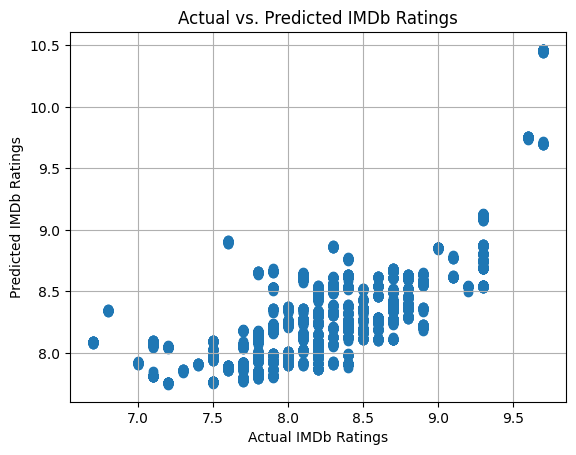

In [5]:


plt.scatter(y_test, predictions)
plt.xlabel("Actual IMDb Ratings")
plt.ylabel("Predicted IMDb Ratings")
plt.title("Actual vs. Predicted IMDb Ratings")
plt.grid(True)


plt.show()

# **Discussion**

  Our hypothesis is proven true here. This means that popularity does have correlation to the score, but this does not mean it necessarly causes a good score. Some shows may have a small fanbase but have exelent ratings. Another problem is that this may not apply with everything. Some popular shows have horrible ratings because they are not that good. If I were to take this to the next step I would probably gather more data from other shows that are less popular and test them against eachoter. This would give the data more variation and also further prove or disprove my hypothesis.

# **GitHub**
This is my GitHub and also link to the dataset:
https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv

https://github.com/sirmelon/office-dataset

# **Abstract**

**Problem**

  My research questions is: If the votes dip how will this affect the IMDb score. This is important because it will show how populartiy could affect the ratings of certain show

**Aproach**

  I used the vote count and the IMDb_score variables and graphed it. I then graphed these two varibles on a scatter plot to see how the popularity affected the score.

**Results**

  The main findings proved that as the votes go up so do the votes proving that we were correct in our hypothesis.

**Conclusion**

  The main finding is that popularity is a pretty huge factor to ratings, but not the only one. This is important when talking about less mainstream content and shows.

**Aknowledgement**

  Thanks to my mentor Derek Solberg for giving me this oppurtunity to work on this dataset! Also thanks to my TAS Abishek and Jaden for helping with the code of the project! Also last but not least The coding school for giving me this wonderful experience and oppurtunity!